In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
eto = pd.read_csv('/content/drive/MyDrive/Universidad/Evapotranspiration-Prediction-2022/data_processing/data/Eto-Rinconada.csv',index_col='Data')
one_day = pd.read_csv('/content/drive/MyDrive/Universidad/Evapotranspiration-Prediction-2022/data_processing/weather_forecast_data/processed_forecast_historical/1-Day(s)-forecast-Horizon.csv',index_col='date')
three_days = pd.read_csv('/content/drive/MyDrive/Universidad/Evapotranspiration-Prediction-2022/data_processing/weather_forecast_data/processed_forecast_historical/3-Day(s)-forecast-Horizon.csv',index_col='date')
seven_days = pd.read_csv('/content/drive/MyDrive/Universidad/Evapotranspiration-Prediction-2022/data_processing/weather_forecast_data/processed_forecast_historical/7-Day(s)-forecast-Horizon.csv',index_col='date')

In [36]:
eto.index = pd.to_datetime(eto.index,format='%d-%m-%Y')
eto_1 = eto['Eto']['2021-01-01':'2022-06-01']
eto_3 = eto['Eto']['2021-01-01':'2022-06-04']
eto_7 = eto['Eto']['2021-01-01':'2022-06-08']
one_day = one_day[['tmin','tmax','temp','rh','rhmin','rhmax','wind','cod_wc','ra']]
three_days = three_days[['tmin','tmax','temp','rh','rhmin','rhmax','wind','cod_wc','ra']]
seven_days = seven_days[['tmin','tmax','temp','rh','rhmin','rhmax','wind','cod_wc','ra']]

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
X_ = []
y_true = []
y_true_3 = []
y_true_7 = []

y_hat_3 = []
y_hat_7 = []
y_hat = []
for i in range(len(one_day)):
  if (412+i == len(one_day) and 412+i==len(eto_1)):
    break
  else:
    train_data = np.array(one_day[i:412+i])
    train_eto = np.array(eto_1[i:412+i])

    reg = LinearRegression()
    reg.fit(train_data,train_eto)

    x_test = np.array(one_day[:412+i+1])
    x_test = x_test[-1:]
    x_test_3 = np.array(three_days[:412+i+1])
    x_test_3 = x_test_3[-1:]
    x_test_7 = np.array(seven_days[:412+i+1])
    x_test_7 = x_test_7[-1:]

    y_test = np.array(eto_1[:412+i+1])
    y_test = y_test[-1:]
    y_test_3 = np.array(eto_3[:412+i+3])
    y_test_3 = y_test_3[-1:]
    y_test_7 = np.array(eto_7[:412+i+7])
    y_test_7 = y_test_7[-1:]

    X_.append(x_test)
    y_true.append(y_test)
    y_true_3.append(y_test_3)
    y_true_7.append(y_test_7)

    y_hat.append(reg.predict(x_test))
    y_hat_3.append(reg.predict(x_test_3))
    y_hat_7.append(reg.predict(x_test_7))

In [39]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2_1 = r2_score(y_true,y_hat)
mse_1 = mean_squared_error(y_true,y_hat)
mae_1 = mean_absolute_error(y_true,y_hat)

r2_3 = r2_score(y_true_3,y_hat_3)
mse_3 = mean_squared_error(y_true_3,y_hat_3)
mae_3 = mean_absolute_error(y_true_3,y_hat_3)

r2_7 = r2_score(y_true_7,y_hat_7)
mse_7 = mean_squared_error(y_true_7,y_hat_7)
mae_7 = mean_absolute_error(y_true_7,y_hat_7)

In [53]:
print(r2_7,np.sqrt(mse_7),mae_7)

0.8008166330905194 0.6273170325301188 0.4863630834832256


In [51]:
np.mean(y_true)

2.8150476190476184

In [54]:
np.sqrt(mse_7)/np.mean(y_true_7)

0.24341569998397075

In [60]:
reg.coef_

array([-0.08777   ,  0.0220493 ,  0.17592819, -0.03531496,  0.0234536 ,
        0.00311842, -0.16246233,  0.1983474 ,  0.12779887])

In [59]:
reg.intercept_

-1.9514374023727155

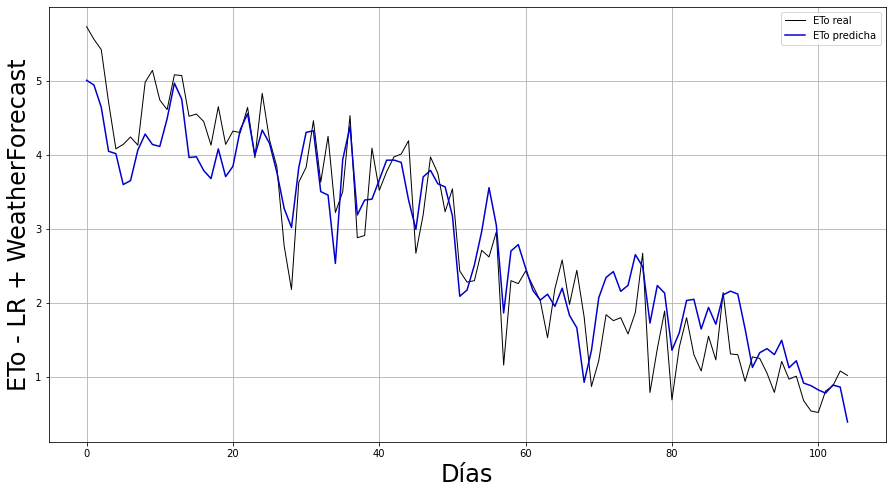

In [47]:
fig = plt.subplots(figsize=[15,8])
plt.grid()
plt.plot(y_true,'-', color = 'black', ms=4, lw=1, alpha=1, label='ETo real')
plt.plot(y_hat,'-', color = 'mediumblue', ms=4, alpha=1, label='ETo predicha',linewidth=1.5)
plt.legend();
plt.xlabel("Días", fontsize=24)
plt.ylabel("ETo - LR + WeatherForecast", fontsize=24);

In [ ]:
len(y_true)

105